In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

In [8]:
df = pd.read_csv("Z:\loan_prediction.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [9]:
#dropping load_id column don't need it
df = df.drop('Loan_ID',axis=1)
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [10]:
# checking for null values.
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [11]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [12]:
# filling null values of categorical columns

df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
df['Married'].fillna(df['Married'].mode()[0],inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)


In [13]:
df.isnull().sum()


Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [14]:
# filling null values of numerical columns
df['LoanAmount'].fillna(df['LoanAmount'].median(),inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0],inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)


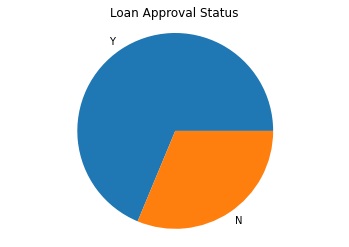

In [15]:
import matplotlib.pyplot as plt

loan_status_count = df['Loan_Status'].value_counts()
plt.pie(loan_status_count,labels = loan_status_count.index)
plt.title('Loan Approval Status')
plt.axis('equal') 
plt.show()

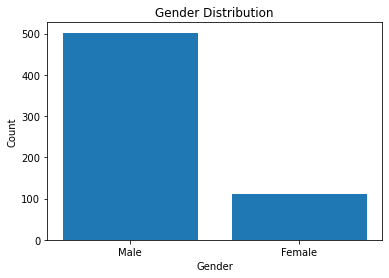

In [16]:
import matplotlib.pyplot as plt

gender_count = df['Gender'].value_counts()
plt.bar(gender_count.index, gender_count.values)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution')
plt.show()


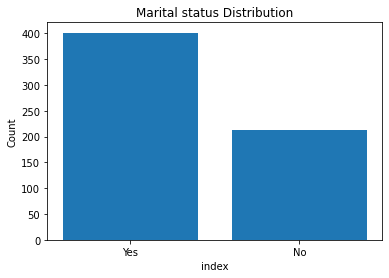

In [17]:
import matplotlib.pyplot as plt
marrige_count = df['Married'].value_counts()
plt.bar(marrige_count.index,marrige_count.values)
plt.xlabel('index')
plt.ylabel('Count')
plt.title('Marital status Distribution')
plt.show()

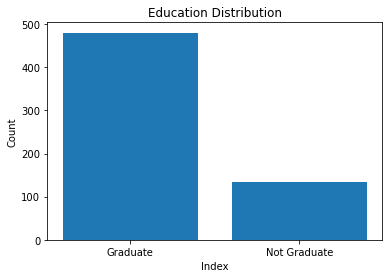

In [18]:
education_count = df['Education'].value_counts()
plt.bar(education_count.index,education_count.values)
plt.title('Education Distribution')
plt.xlabel('Index')
plt.ylabel('Count')
plt.show()

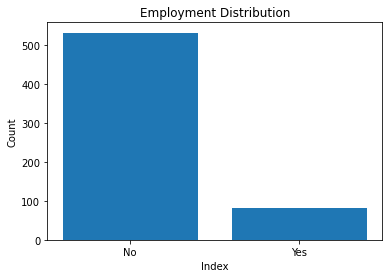

In [19]:
self_employed_count = df['Self_Employed'].value_counts()
plt.bar(self_employed_count.index,self_employed_count.values)
plt.title('Employment Distribution')
plt.xlabel('Index')
plt.ylabel('Count')
plt.show()


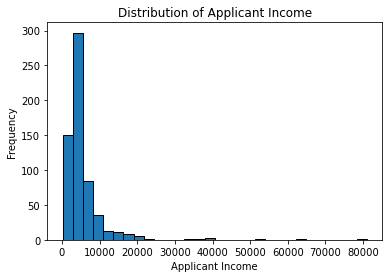

In [20]:
import matplotlib.pyplot as plt

plt.hist(df['ApplicantIncome'], bins=30, edgecolor='black')
plt.xlabel('Applicant Income')
plt.ylabel('Frequency')
plt.title('Distribution of Applicant Income')
plt.show()


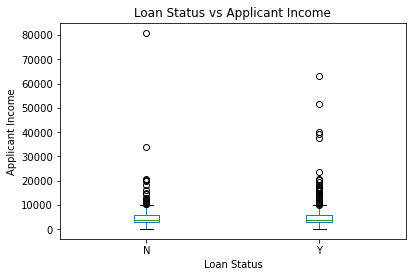

In [22]:
import matplotlib.pyplot as plt


df.boxplot(column='ApplicantIncome', by='Loan_Status', grid=False)
plt.xlabel('Loan Status')
plt.ylabel('Applicant Income')
plt.title('Loan Status vs Applicant Income')
plt.suptitle('')  
plt.show()


In [ ]:
# removing Outliers from applicant income column. 

In [23]:
# calculating the IQR
Q1 = df['ApplicantIncome'].quantile(0.25)
Q3 = df['ApplicantIncome'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 -1.5 *IQR
upper_bound = Q3 - 1.5 *IQR

df = df[(df['ApplicantIncome']>=lower_bound)&(df['ApplicantIncome'])<=upper_bound]

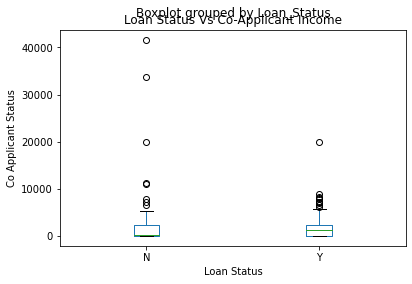

In [25]:
# loan status vs CoApplicant Income

df.boxplot(column='CoapplicantIncome',by='Loan_Status',grid=False)
plt.xlabel('Loan Status')
plt.ylabel('Co Applicant Status')
plt.title('Loan Status Vs Co-Applicant Income')
plt.show()

In [26]:
Q1 = df['CoapplicantIncome'].quantile(0.25)
Q3 = df['CoapplicantIncome'].quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Removeing outliers
df = df[(df['CoapplicantIncome'] >= lower_bound) & (df['CoapplicantIncome'] <= upper_bound)]

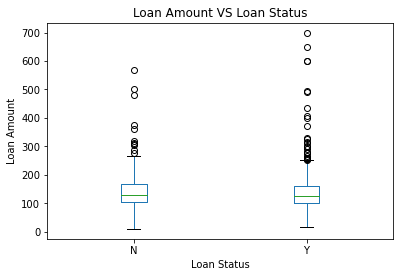

In [28]:
# loan amount and loan status

df.boxplot(column='LoanAmount',by='Loan_Status',grid = False)
plt.xlabel('Loan Status')
plt.ylabel('Loan Amount')
plt.title('Loan Amount VS Loan Status')
plt.suptitle('') 
plt.show()

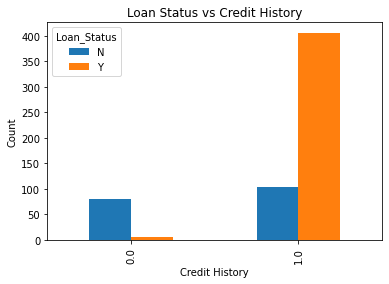

In [33]:
# loan status vs credit hist.
df.groupby(['Credit_History', 'Loan_Status']).size().unstack().plot(kind='bar', stacked=False)
plt.xlabel('Credit History')
plt.ylabel('Count')
plt.title('Loan Status vs Credit History')
plt.show()



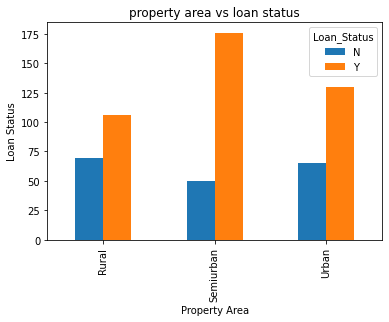

In [34]:
# property area and loan Status

df.groupby(['Property_Area','Loan_Status']).size().unstack().plot(kind='bar',stacked=False)
plt.xlabel('Property Area')
plt.ylabel('Loan Status')
plt.title('property area vs loan status')
plt.show()

In [ ]:
# training model

In [36]:
# converting categorical column into numerical using one-hot-encoder
cat_cols = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']
df=pd.get_dummies(df,columns=cat_cols)

#splitting the data into feature X and Target Y
X=df.drop('Loan_Status',axis=1)
y=df['Loan_Status']

#split the data in train and test set
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

#scale the numerical columns using standerdScaler

scaler = StandardScaler()
numerical_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']

X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.fit_transform(X_test[numerical_cols])



Z:\anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)
Z:\anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [37]:
from sklearn.svm import SVC
model = SVC(random_state=42)
model.fit(X_train, y_train)

SVC(random_state=42)

In [38]:
y_pred = model.predict(X_test)
print(y_pred)

['Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'N' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'N' 'Y'
 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'N' 'Y' 'Y'
 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'N']


In [41]:
# Convert X_test to a DataFrame
X_test_df = pd.DataFrame(X_test, columns=X_test.columns)

# Add the predicted values to X_test_df
X_test_df['Loan_Status_Predicted'] = y_pred
X_test_df.head(20)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,...,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Predicted
195,-0.360830,0.873970,0.763643,0.172625,0.392232,0,1,0,1,0,...,0,0,1,0,1,0,0,1,0,Y
245,0.289378,2.060498,-0.119351,-2.786657,0.392232,0,1,1,0,1,...,0,0,1,0,0,1,0,0,1,Y
475,2.617901,-0.189838,0.410445,0.172625,0.392232,0,1,0,1,0,...,1,0,1,0,0,1,1,0,0,Y
478,2.649466,0.648190,-0.719787,0.172625,0.392232,0,1,0,1,0,...,0,0,1,0,0,1,0,1,0,Y
189,1.018055,-0.877346,1.081521,-2.786657,0.392232,0,1,0,1,1,...,0,0,1,0,1,0,1,0,0,Y
308,3.442165,-0.877346,6.238206,0.172625,0.392232,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,Y
104,-0.207226,-0.366122,0.587044,0.172625,0.392232,0,1,0,1,1,...,0,0,1,0,1,0,0,0,1,Y
294,-0.525772,1.383160,0.798962,0.172625,0.392232,0,1,0,1,1,...,0,0,1,0,1,0,0,1,0,Y
398,-0.188108,0.252229,-0.313610,0.172625,0.392232,0,1,1,0,1,...,0,0,0,1,1,0,1,0,0,Y
583,-0.637586,-0.877346,-1.161284,0.172625,0.392232,0,1,0,1,0,...,0,0,1,0,1,0,1,0,0,Y
